In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
from pandas import to_datetime
from collections import defaultdict
from scipy.stats.stats import pearsonr, iqr


In [2]:
# Legge il CSV
df = pd.read_csv('customer_supermarket.csv', sep='\t', index_col=0)
# Trasforma il campo "Sale" in un float
df["Sale"] = df["Sale"].str.replace(",", ".").astype(float)
# Trasforma il campo "BasketDate" in un datetime
df["BasketDate"] = pd.to_datetime(df["BasketDate"])

df.head()

BasketID          BasketDate  Sale  CustomerID CustomerCountry  ProdID  \
0   536365 2010-01-12 08:26:00  2.55     17850.0  United Kingdom  85123A   
1   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom   71053   
2   536365 2010-01-12 08:26:00  2.75     17850.0  United Kingdom  84406B   
3   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom  84029G   
4   536365 2010-01-12 08:26:00  3.39     17850.0  United Kingdom  84029E   

                             ProdDescr  Qta  
0   WHITE HANGING HEART T-LIGHT HOLDER    6  
1                  WHITE METAL LANTERN    6  
2       CREAM CUPID HEARTS COAT HANGER    8  
3  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       RED WOOLLY HOTTIE WHITE HEART.    6

# DATA SEMANTICS



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


Nel dataset si descrivono le sessioni di acquisto di un certo numero di clienti. Una sessione di acquisto, detta basket (`BasketID`) e si svolge in una data (`BasketDate`), e viene effettuata da un cliente (CustomerID) residente in uno stato (`CustomerCountry`).
Ogni sessione rappresenta una serie di prodotti acquistati da un cliente, e in un record è possibile ritrovare, per il singolo prodotto, l’identificativo (`ProdID`), la descrizione (`ProdDescr`), e  la quantità (`Qtà`). Infine viene riportato il costo unitario del prodotto (`Sale`).

# DISTRIBUTION OF VARIABLES AND STATISTICS


In [4]:
df.describe()

Sale     CustomerID            Qta
count  471910.000000  406830.000000  471910.000000
mean        4.030945   15287.684160      10.716533
std        83.769380    1713.603074     231.355136
min    -11062.060000   12346.000000  -80995.000000
25%         1.250000   13953.000000       1.000000
50%         2.080000   15152.000000       4.000000
75%         3.750000   16791.000000      12.000000
max     38970.000000   18287.000000   80995.000000

In [5]:
print("Distinct Values in BasketID: \n", df.BasketID.nunique())
print("Distinct Values in BasketDate:\n", df.BasketDate.nunique())
print("Distinct Values in Sale: \n", df.Sale.nunique())
print("Distinct Values in CustomerID: \n", df.CustomerID.nunique())
print("Distinct Values in CustomerCountry: \n", df.CustomerCountry.nunique())
print("Distinct Values in ProdID: \n", df.ProdID.nunique())
print("Distinct Values in ProdDescr: \n", df.ProdDescr.nunique())

Distinct Values in BasketID: 
 24627
Distinct Values in BasketDate:
 22428
Distinct Values in Sale: 
 1146
Distinct Values in CustomerID: 
 4372
Distinct Values in CustomerCountry: 
 38
Distinct Values in ProdID: 
 3953
Distinct Values in ProdDescr: 
 4097


## Date e ore di maggiore traffico nei negozi

## Orari di maggiore frequentazione

Di seguito si mostrano i diagrammi a barre contenenti il numero di `BasketID` per ora del giorno.

<AxesSubplot:xlabel='BasketDate'>

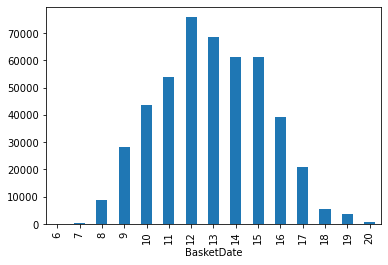

In [6]:
df.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

L'ora del giorno più frequentata sembra essere le 12.

Si restringono le date al 2010 e si osserva come in questo anno l'ora più frequentata siano le 14

<AxesSubplot:xlabel='BasketDate'>

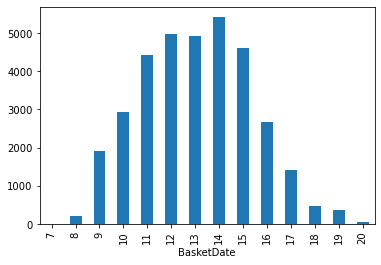

In [7]:
df[df["BasketDate"].dt.year == 2010].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

Mentre nel 2011 l'orario di maggiore frequenza si confermano le 12.

<AxesSubplot:xlabel='BasketDate'>

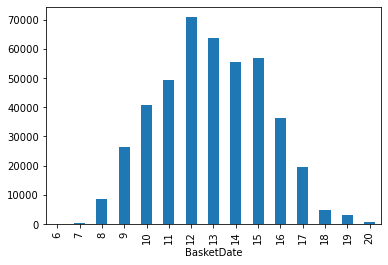

In [8]:
df[df["BasketDate"].dt.year == 2011].groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar")

## Date di maggiore frequentazione

Si mostrano le date di maggiore traffico per gli anni 2010 e 2011

Dato che relativamente al 2010 sono presenti solo 20 record è possibile mostrarli in un unico grafico

20


<AxesSubplot:xlabel='BasketDate'>

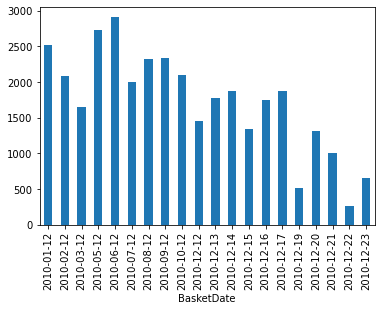

In [9]:
df_2010 = df[df["BasketDate"].dt.year == 2010]

print(df_2010["BasketDate"].dt.date.nunique())

df_2010.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

TODO: Grafici per ogni gruppo di mesi del 2011

<AxesSubplot:xlabel='BasketDate'>

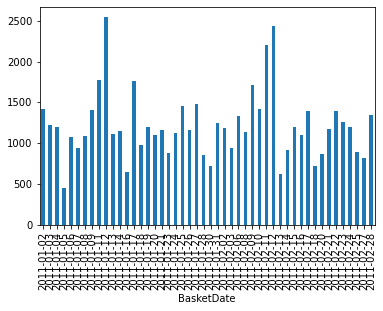

In [10]:
first_three_months = df[(df["BasketDate"].dt.year == 2011) & (df["BasketDate"].dt.month < 3 )]

first_three_months.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

## Paesi in cui sono stati effettuati piu acquisti

<AxesSubplot:title={'center':'Best buy coutry'}, xlabel='CustomerCountry'>

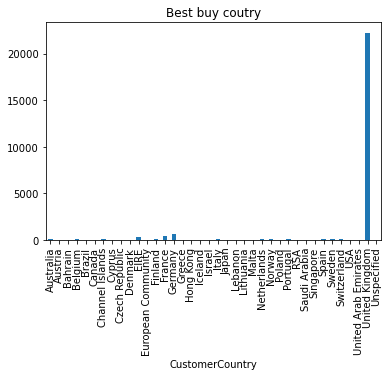

In [11]:
df.groupby('CustomerCountry')["BasketID"].nunique().plot(kind='bar',

title='Best buy coutry')

In [12]:
#verificare a cosa è dovuta la variazione di prezzo
df.groupby(["ProdID",'Qta'])["Sale"].unique()

ProdID        Qta
10002         -3                  [0.0]
               1     [0.85, 1.66, 1.63]
               2     [1.66, 0.85, 1.63]
               3                 [0.85]
               4                 [0.85]
                            ...        
gift_0001_30   1          [25.53, 25.0]
               30                 [0.0]
gift_0001_40   1         [34.04, 33.33]
gift_0001_50   1                [41.67]
m              1                 [2.55]
Name: Sale, Length: 42152, dtype: object

# ASSESSING DATA QUALITY (MISSING VALUES, OUTLIERS)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.4+ MB


Si osserva che le uniche quantità settate a NaN sono `CustomerID` e le `ProdDescr`. I record che non hanno `CustomerID` non portano informazioni riguardo al profilo del cliente, mentre la `ProdDescr` può essere recuperata dai record con lo stesso `ProdID`.

In [14]:
df = df[~(df["CustomerID"].isnull())]

## Outliers nella quantità (`Qta`)

La distribuzione della quantità segue la seguente distribuzione:

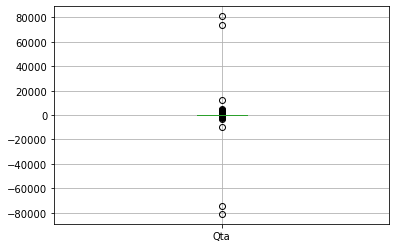

In [15]:
boxplot = df.boxplot(column=['Qta'])

Eliminiamo quindi i record la cui distanza interquartile è troppo alta:

In [16]:
def drop_iqr(column, treshold=1.5):
    global df
    data = df[column]
    Q1 = data.quantile(q = 0.25)
    Q3 = data.quantile(q = 0.75)
    IQR = data.apply(iqr)
    #only keep rows in dataframe that have values within treshold*IQR of Q1 and Q3
    df = df[~((df[column] < (Q1-treshold*IQR)) | (df[column] > (Q3+treshold*IQR)))]
drop_iqr("Qta")
drop_iqr("Sale")

<AxesSubplot:>

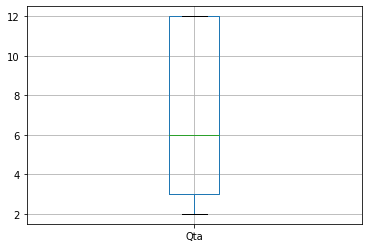

In [17]:
df.boxplot(column=["Qta"])

<AxesSubplot:>

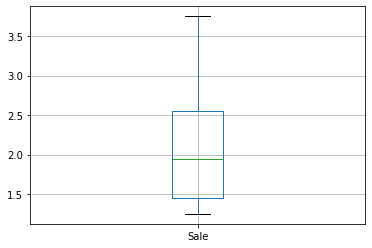

In [18]:
df.boxplot(column=["Sale"])

Boxplot raggruppato per paese

In [ ]:
df.boxplot(column=["CustomerID"], by="CustomerCountry")

# Outliers in Sale

In [ ]:
df["Sale"].plot.box()

In [ ]:
df[(df["Sale"] < 0)]
#vengono rimossi

In [ ]:
df=df[(df["Sale"] >= 0)]

In [ ]:
df[df["Sale"] > 30000]
#viene mantenuto in quanto ha informazioni

# VARIABLES TRANSFORMATION & GENERATION

## Prezzo nullo

I record con prezzo 0 si considerano missing values, per cui si cerca di recuperare il valore di `Sale` a partire dalla media dei prezzi dello stesso `ProdID`.

In [19]:
df["Sale"] = df.groupby("ProdID")["Sale"].transform(lambda group: group.replace(to_replace=0, method="ffill", value = group.mean()))

## ProdDescr non disponibile

Per rendere più interpretabili certe analisi riteniamo che sia utile recuperare la `ProdDescr` degli elementi che non l'hanno settata. Analogamente al caso precedente, si costruisce una funzione che recupera la descrizione di ogni prodotto dagli altri record.

In [20]:
def replace_first_notna(group: pd.Series, column: str):
    # Indice del primo record con ProdID comune non NaN
    i: int = group.first_valid_index()
    # Se i è None non ci sono ProdDescr valide
    if i is None:
        return group
    # Valore di ProdDescr valido
    value = df.loc[i][column]
    return group.fillna(value)
 
df["ProdDescr"] = df.groupby("ProdID")["ProdDescr"].transform(lambda x: replace_first_notna(x, "ProdDescr"))

In [21]:
df[df["ProdDescr"].isnull()]

Empty DataFrame
Columns: [BasketID, BasketDate, Sale, CustomerID, CustomerCountry, ProdID, ProdDescr, Qta]
Index: []

# PAIRWISE CORRELATION & ELIMINATION OF REDUNTANT VARIABLES

Si discretizzano le variabili non numeriche all'interno del dataset:

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df.copy()
for column in {"BasketID", "BasketDate", "CustomerCountry", "ProdID", "ProdDescr"}:
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))

Si definisce la matrice di correlazione tra gli attributi:

In [23]:
df_copy.corr().style.background_gradient(cmap='coolwarm')

Dato che non si osservano correlazioni notevoli (maggiori dell'80%) non è il caso di eliminare attributi ridondanti.

In [24]:
df.to_csv("./preprocessed.csv")

# DATA PREPARATION

Costruzione di attributi che caratterizzano il comportamento di un utente.

Si caricano i dati preprocessati, considerando per ora solo quelli con `CustomerID` non nullo:

In [ ]:
df = pd.read_csv("./preprocessed.csv", index_col=0)
df = df[~(df["CustomerID"].isnull())]
df["BasketDate"] = pd.to_datetime(df["BasketDate"])
df

In [26]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

df["CustomerCountry"] = label.fit_transform(df["CustomerCountry"])

In [27]:
from indicators import customer_features

customer_indicators = df.groupby("CustomerID").apply(customer_features)
customer_indicators = pd.DataFrame(customer_indicators.values.tolist(), index=customer_indicators.index)
customer_indicators

I  Iu  spending  Imax  returned_items  best_country  returning  \
CustomerID                                                                     
12347.0     804  60   1766.66   250               0            16        0.0   
12349.0     316  34    599.56   316               0            18        0.0   
12350.0     150  13    255.30   150               0            24        0.0   
12352.0     353  30    644.29    74               0            24        0.0   
12353.0      14   2     29.30    14               0             2        0.0   
...         ...  ..       ...   ...             ...           ...        ...   
18280.0      34   6    104.30    34               0            35        0.0   
18281.0      16   2     31.80    16               0            35        0.0   
18282.0      25   4     71.35    15               0            35        0.0   
18283.0     574  91   1066.69   121               0            35        0.0   
18287.0     224  23    419.10   154               0            35        0.0   

            max_cost  min_cost  most_bought_cost  most_returned_cost  \
CustomerID                                                             
12347.0         3.75       NaN              3.75                   0   
12349.0         3.75       NaN              1.65                   0   
12350.0         2.95       NaN              1.25                   0   
12352.0         3.75       NaN              1.65                   0   
12353.0         2.95       NaN              1.45                   0   
...              ...       ...               ...                 ...   
18280.0         3.75       NaN              2.95                   0   
18281.0         2.55       NaN              1.65                   0   
18282.0         3.25       NaN              2.95                   0   
18283.0         3.25       NaN              1.65                   0   
18287.0         3.75       NaN              1.25                   0   

            avg_bought  avg_returned  hour  month  baskets         E  
CustomerID                                                            
12347.0       2.444607           NaN    14      7        7  5.717969  
12349.0       2.062941           NaN     9     11        1  5.018405  
12350.0       1.750000           NaN    16      2        1  3.683856  
12352.0       2.073243           NaN    14      3        7  4.690421  
12353.0       2.200000           NaN    17      5        1  0.985228  
...                ...           ...   ...    ...      ...       ...  
18280.0       3.150000           NaN     9      7        1  2.542483  
18281.0       2.100000           NaN    10     12        1  0.954434  
18282.0       2.925000           NaN    11      2        2  1.941901  
18283.0       1.824541           NaN    12     11       15  6.050399  
18287.0       2.067391           NaN    10      5        2  4.439713  

[4014 rows x 17 columns]

Per preparare adeguatamente il clustering si normalizzano i valori numerici e si assegnano label numeriche agli attributi non testuali.

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

labels = list(set(customer_indicators.columns) - {"best_country", "hour", "month"})

customer_indicators[labels] = scaler.fit_transform(customer_indicators[labels].fillna(0).values)
customer_indicators

I        Iu  spending      Imax  returned_items  \
CustomerID                                                           
12347.0     0.039021  0.069168  0.041910  0.233083             0.0   
12349.0     0.015278  0.038687  0.014184  0.295113             0.0   
12350.0     0.007201  0.014068  0.006006  0.139098             0.0   
12352.0     0.017078  0.033998  0.015247  0.067669             0.0   
12353.0     0.000584  0.001172  0.000637  0.011278             0.0   
...              ...       ...       ...       ...             ...   
18280.0     0.001557  0.005862  0.002418  0.030075             0.0   
18281.0     0.000681  0.001172  0.000696  0.013158             0.0   
18282.0     0.001119  0.003517  0.001636  0.012218             0.0   
18283.0     0.027830  0.105510  0.025282  0.111842             0.0   
18287.0     0.010801  0.025791  0.009897  0.142857             0.0   

            best_country  returning  max_cost  min_cost  most_bought_cost  \
CustomerID                                                                  
12347.0               16        0.0      1.00       0.0              1.00   
12349.0               18        0.0      1.00       0.0              0.16   
12350.0               24        0.0      0.68       0.0              0.00   
12352.0               24        0.0      1.00       0.0              0.16   
12353.0                2        0.0      0.68       0.0              0.08   
...                  ...        ...       ...       ...               ...   
18280.0               35        0.0      1.00       0.0              0.68   
18281.0               35        0.0      0.52       0.0              0.16   
18282.0               35        0.0      0.80       0.0              0.68   
18283.0               35        0.0      0.80       0.0              0.16   
18287.0               35        0.0      1.00       0.0              0.00   

            most_returned_cost  avg_bought  avg_returned  hour  month  \
CustomerID                                                              
12347.0                    0.0    0.477843           0.0    14      7   
12349.0                    0.0    0.325176           0.0     9     11   
12350.0                    0.0    0.200000           0.0    16      2   
12352.0                    0.0    0.329297           0.0    14      3   
12353.0                    0.0    0.380000           0.0    17      5   
...                        ...         ...           ...   ...    ...   
18280.0                    0.0    0.760000           0.0     9      7   
18281.0                    0.0    0.340000           0.0    10     12   
18282.0                    0.0    0.670000           0.0    11      2   
18283.0                    0.0    0.229817           0.0    12     11   
18287.0                    0.0    0.326957           0.0    10      5   

             baskets         E  
CustomerID                      
12347.0     0.033149  0.626473  
12349.0     0.000000  0.549827  
12350.0     0.000000  0.403611  
12352.0     0.033149  0.513893  
12353.0     0.000000  0.107944  
...              ...       ...  
18280.0     0.000000  0.278560  
18281.0     0.000000  0.104570  
18282.0     0.005525  0.212759  
18283.0     0.077348  0.662895  
18287.0     0.005525  0.486424  

[4014 rows x 17 columns]

In [29]:
customer_indicators.corr().abs()..style.background_gradient(cmap='coolwarm')

## Principal component analisys

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X = pca.fit_transform(customer_indicators.values)
X

array([[17.12494777, -0.44870276,  2.05071426],
       [15.2449771 , -4.23178876, -3.1567808 ],
       [ 9.11996068,  4.57500242,  3.9820809 ],
       ...,
       [-1.70555197,  4.90852994, -1.37904187],
       [-1.84483961, -4.12321034, -0.7194167 ],
       [-1.70754461,  1.94714675, -2.48766483]])

In [31]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [32]:
def hierarchical_clusterize(X, linkage):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=linkage)
    model = model.fit(X)
    plt.figure(figsize=(10, 10))
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='level', p=3)
    plt.xlabel(f"{linkage} linkage")
    plt.show()
    plt.scatter(
        x = customer_indicators["I"],
        y = customer_indicators["Iu"],
        c = model.labels_
    )


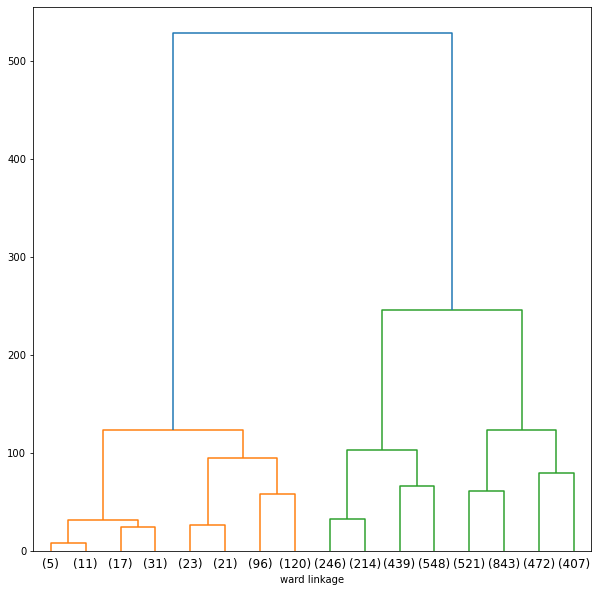

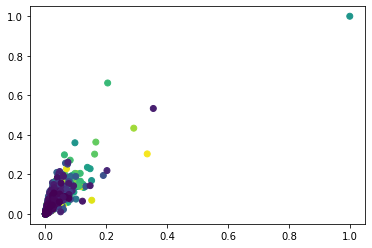

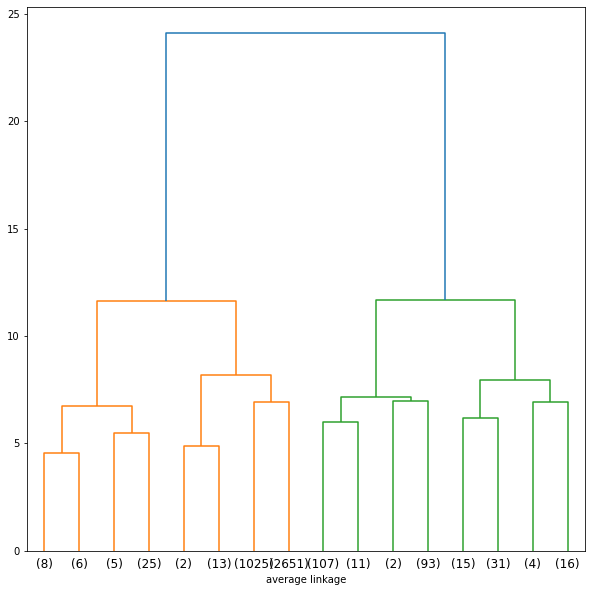

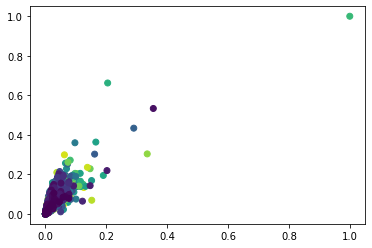

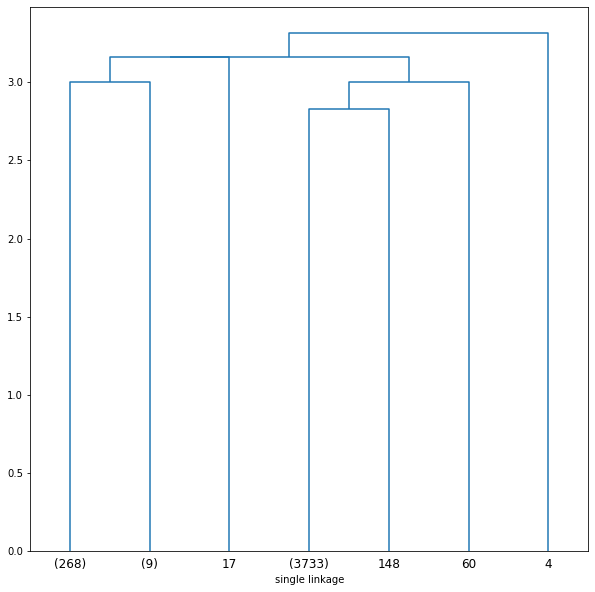

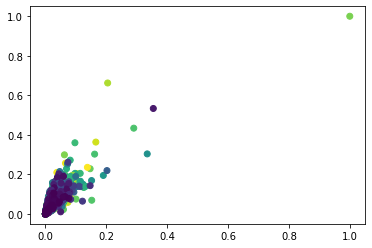

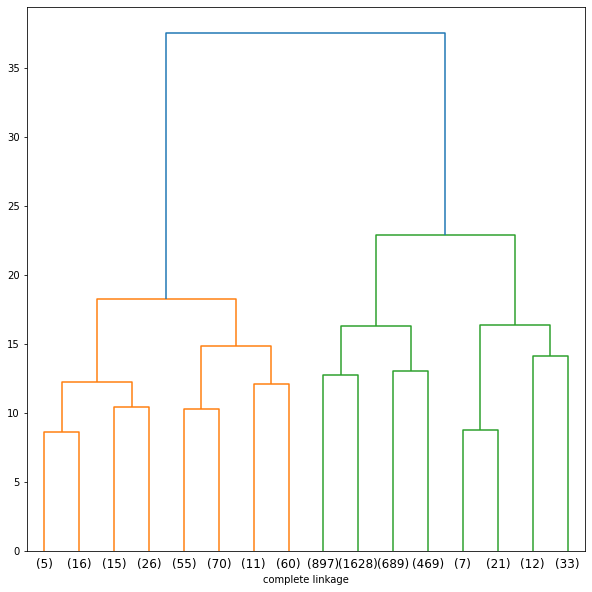

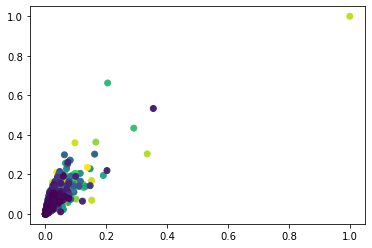

In [39]:
for linkage in {"ward", "complete", "average", "single"}:
    hierarchical_clusterize(X, linkage)

## X-Means

Si utilizza l'algoritmo contenuto nella libreria `PyClustering`, che non necessita di specificare un numero di clusters.

Total WCE: 28400.12297946611


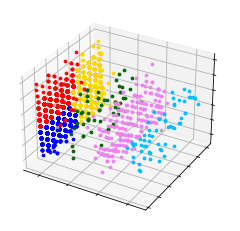

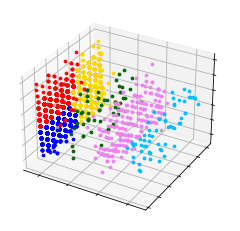

In [37]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X, amount_initial_centers).initialize()

# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(X, initial_centers, 6)
xmeans_instance.process()

# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Print total sum of metric errors
print("Total WCE:", xmeans_instance.get_total_wce())
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X.tolist())
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

In [38]:
len(clusters)

6